# SENG 231 term project

Welcome to the **Data science with Python** project! Please, read the instructions below **carefully** before start writing code. 

To actually write down your implementation, make sure to fill in any place that says <code style="color:green">**_# YOUR CODE HERE_**</code>.

Once you are done, save the file as:

<code>**NAME_LASTNAME_2024.ipynb**</code>

For example:

<code>**SARPER_ALKAN_2024.ipynb**</code>

After you complete this notebook, put the dataset and the notebook in a folder and zip the folder. Upload the zipped folder with your student id as the name such as:

<code>**NAME_LASTNAME_2024.zip**</code>

For example:

<code>**SARPER_ALKAN_2024.zip**</code>

Write your first and last name in the next cell, and run that cell first before you do anything else with the document. Also write your project partner's name and surname in the cell.

### Only one of you should upload the document. No multiple uploads!!!


In [2]:
first_name = "Fevzi Samed"
last_name = "Ünal"
student_id="220205032"
partner_name = "Davut"
partner_last_name = "Özcan"

partner_student_id = "220204001"

import math
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Adding the following line, allows Jupyter Notebook to visualize plots
# produced by matplotlib directly below the code cell which generated those.
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr
from nose.tools import assert_equal

# Import stats module from scipy, which contains a large number 
# of probability distributions as well as an exhaustive library of statistical functions.
import scipy.stats as stats
# Import the sub-module 'linear_model' of scikit-learn
# this sub-module implements generalized linear models.
# API: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
from sklearn import linear_model
# Import two quality metrics which will be used to assess the quality
# of our predictions: MSE and R squared (a.k.a. coefficient of determination)
from sklearn.metrics import mean_squared_error, r2_score

EPSILON = .0000001 # tiny tolerance for managing subtle differences resulting from floating point operations

DATASET_FILE = "dataset.csv"

In this project, you will be working with the dataset file <code>**dataset.csv**</code>. For a complete description of this data source, please refer to the <code>**README.txt**</code> file included in the archive.
In a nutshell, this dataset contains **721** unique Pokemons, including their number (ID), name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. Finally, it also shows whether the Pokemon is "legendary" or not.<br />
The cell below is responsible for correctly loading the dataset from the <code>**dataset.csv**</code> file. Once this is executed, you can start answering the questions below.

In [3]:
# Load the dataset stored at `DATASET_FILE` using "," as field separator and '?' to detect NAs
# and the specified columns as header

# column names used as header
colnames = ['id', 'name', 'type_1', 'type_2', 'total', 'hp', 'attack', 'defense', 
            'special_attack', 'special_defense', 'speed', 'generation', 'is_legendary']

# load dataset
data = pd.read_csv(DATASET_FILE, 
                   sep=',',
                   header=0,
                   names=colnames,
                   na_values='?')

# remove any duplicates
data = data.drop_duplicates('id', keep='first', inplace=False)
data.reset_index(inplace=True, drop=True)
np.random.seed(np.abs(hash(first_name+last_name))// 100000000000)
data.iloc[np.random.choice(721, np.random.randint(1,20), replace=False).tolist(), 6] = np.nan
data.iloc[np.random.choice(721, np.random.randint(1,20), replace=False).tolist(), 2] = np.nan
data.iloc[np.random.choice(721, np.random.randint(1,20), replace=False).tolist(), 8] = np.nan
print("Loaded `Pokemon` dataset into a dataframe of size ({} x {})".format(data.shape[0], data.shape[1]))

data.head()

Loaded `Pokemon` dataset into a dataframe of size (721 x 13)


,id,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,is_legendary
0,1,Bulbasaur,Grass,Poison,318,45,49.0,49,65.0,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62.0,63,80.0,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82.0,83,100.0,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52.0,43,60.0,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64.0,58,80.0,65,80,1,False


## Part 1: Handle the missing values (10 Points)

In the cell below, find the missing values in each column. Then, handle the missing values appropriately. In other words, delete the column if it has too many missing values, or replace the missing values using proper techniques. Then write your comments in the following cell.

In [4]:
# Write your code below this line
print(" Are there any null or missing entries in the dataset?", data.isnull().any().any())
missing_values = data.isnull().sum()
print("The count of missing values for each column:")
print(missing_values)
print("The count of missing values in each column where the number of missing values exceeds zero:")
print(missing_values[missing_values > 0])

 Are there any null or missing entries in the dataset? True
The count of missing values for each column:
id                   0
name                 0
type_1              18
type_2             371
total                0
hp                   0
attack               5
defense              0
special_attack       9
special_defense      0
speed                0
generation           0
is_legendary         0
dtype: int64
The count of missing values in each column where the number of missing values exceeds zero:
type_1             18
type_2            371
attack              5
special_attack      9
dtype: int64


In [5]:
print("The  missing values in the 'type_1' column is:")
mask_1=data['type_1'].isnull()
nan_type_1 = data[mask_1]
nan_type_1

The  missing values in the 'type_1' column is:


,id,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,is_legendary
55,56,Mankey,NaN,NaN,305,40,80.0,35,35.0,45,70,1,False
105,106,Hitmonlee,NaN,NaN,455,50,120.0,53,35.0,110,87,1,False
135,136,Flareon,NaN,NaN,525,65,130.0,60,95.0,110,65,1,False
152,153,Bayleef,NaN,NaN,405,60,62.0,80,63.0,80,60,2,False
210,211,Qwilfish,NaN,Poison,430,65,95.0,75,55.0,55,85,2,False
219,220,Swinub,NaN,Ground,250,50,50.0,40,30.0,30,50,2,False
226,227,Skarmory,NaN,Flying,465,65,80.0,140,40.0,70,70,2,False
262,263,Zigzagoon,NaN,NaN,240,38,30.0,41,30.0,41,60,3,False
295,296,Makuhita,NaN,NaN,237,72,60.0,30,20.0,30,25,3,False
299,300,Skitty,NaN,NaN,260,50,45.0,45,35.0,35,50,3,False


In [6]:
print("The count of missing values in the 'type_2' column before removing more missing values is:")
mask_2=data['type_2'].isnull()
nan_type_2 = data[mask_2]
nan_type_2


The count of missing values in the 'type_2' column before removing more missing values is:


,id,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,is_legendary
3,4,Charmander,Fire,NaN,309,39,52.0,43,60.0,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64.0,58,80.0,65,80,1,False
6,7,Squirtle,Water,NaN,314,44,48.0,65,50.0,64,43,1,False
7,8,Wartortle,Water,NaN,405,59,63.0,80,65.0,80,58,1,False
8,9,Blastoise,Water,NaN,530,79,83.0,100,85.0,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,705,Sliggoo,Dragon,NaN,452,68,75.0,53,83.0,113,60,6,False
705,706,Goodra,Dragon,NaN,600,90,100.0,70,110.0,150,80,6,False
711,712,Bergmite,Ice,NaN,304,55,69.0,85,32.0,35,28,6,False
712,713,Avalugg,Ice,NaN,514,95,117.0,184,44.0,46,28,6,False


In [7]:
nan_type_2 = nan_type_2.dropna()
print("The number of missing values in the 'type_2' column after removing them is:",nan_type_2.shape[0])

The number of missing values in the 'type_2' column after removing them is: 0


In [8]:
print("The number of missing values in the 'attack' column is:")
mask_3=data['attack'].isnull()
nan_attack = data[mask_3]
nan_attack

The number of missing values in the 'attack' column is:


,id,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,is_legendary
156,157,Typhlosion,Fire,NaN,534,78,NaN,78,109.0,85,100,2,False
311,312,Minun,Electric,NaN,405,60,NaN,50,75.0,85,95,3,False
474,475,Gallade,Psychic,Fighting,518,68,NaN,65,65.0,115,80,4,False
653,654,Braixen,Fire,NaN,409,59,NaN,58,90.0,70,73,6,False
719,720,HoopaHoopa Confined,Psychic,Ghost,600,80,NaN,60,150.0,130,70,6,True


In [9]:
print("The number of missing values in the 'special_attack' column is:")
mask_4=data['special_attack'].isnull()
nan_special_attack = data[mask_4]
nan_special_attack

The number of missing values in the 'special_attack' column is:


,id,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,is_legendary
303,304,Aron,Steel,Rock,330,50,70.0,100,NaN,40,30,3,False
316,317,Swalot,Poison,NaN,467,100,73.0,83,NaN,83,55,3,False
327,328,Trapinch,Ground,NaN,290,45,100.0,45,NaN,45,10,3,False
369,370,Luvdisc,Water,NaN,330,43,30.0,55,NaN,65,97,3,False
452,453,Croagunk,Poison,Fighting,300,48,61.0,40,NaN,40,50,4,False
590,591,Amoonguss,Grass,Poison,464,114,85.0,70,NaN,80,30,5,False
594,595,Joltik,Bug,Electric,319,50,47.0,50,NaN,50,65,5,False
654,655,Delphox,Fire,Psychic,534,75,69.0,72,NaN,100,104,6,False
691,692,Clauncher,Water,NaN,330,50,53.0,62,NaN,63,44,6,False


In [10]:
from pandas.api.types import is_numeric_dtype

data = data.apply(lambda x: x.fillna(x.median()) 
                      if is_numeric_dtype(x) 
                      else x.fillna(x.mode().iloc[0]))

In [11]:
print("After addressing all missing values, do any missing values still remain in the entire DataFrame?",data.isnull().any().any())
print("The total number of missing values remaining after handling all missing values is:",data.isnull().sum().sum())
print("The count of missing values in each column after handling all missing values is:")
missing_values = data.isnull().sum()
print(missing_values)

After addressing all missing values, do any missing values still remain in the entire DataFrame? False
The total number of missing values remaining after handling all missing values is: 0
The count of missing values in each column after handling all missing values is:
id                 0
name               0
type_1             0
type_2             0
total              0
hp                 0
attack             0
defense            0
special_attack     0
special_defense    0
speed              0
generation         0
is_legendary       0
dtype: int64


### Write your comments below this line: </br>
**Column name**: number of missing values

## Part 2: Analyze the data using box plots (20 Points)

In the cell below, create box plots to analyze your data. Specify the number of outliers at each column in the next cell as your comments.

The names of the columns in the dataset are:
['id', 'name', 'type_1', 'type_2', 'total', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'generation', 'is_legendary']
Available to display a box plot:
['total', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']


<Axes: ylabel='speed'>

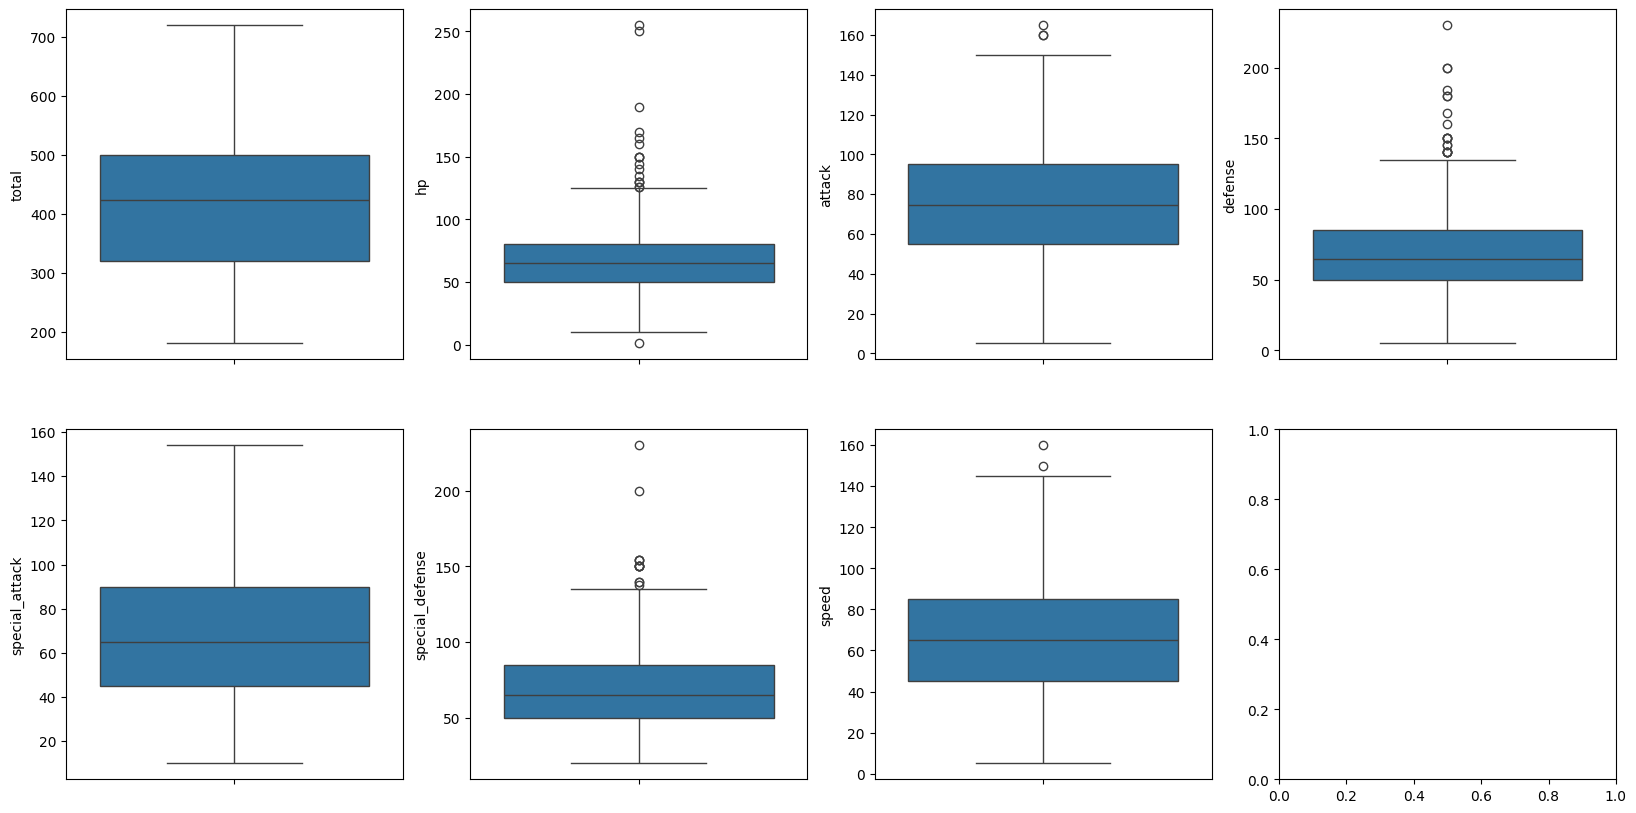

In [12]:
# Create your box plots below this line
print("The names of the columns in the dataset are:")
print(data.columns.tolist())
available_for_box_plot = ['total', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
print("Available to display a box plot:")
print(available_for_box_plot)
fig , axes = plt.subplots(2, 4, figsize=(20, 10))
sns.boxplot(data["total"], ax=axes[0, 0])
sns.boxplot(data["hp"], ax=axes[0, 1])
sns.boxplot(data["attack"], ax=axes[0, 2])
sns.boxplot(data["defense"], ax=axes[0, 3])
sns.boxplot(data["special_attack"], ax=axes[1, 0])
sns.boxplot(data["special_defense"], ax=axes[1, 1])
sns.boxplot(data["speed"],ax=axes[1,2])

In [13]:
# Write the code to find the number of outliers at each column below this line

def find_outliers(column_name):
    q1, q3 = data.loc[data[column_name].notnull(), column_name].quantile([.25, .75])
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    higher_fence = q3 + 1.5 * iqr

    outliers = data.loc[(data[column_name] < lower_fence) | (data[column_name] > higher_fence), column_name]
    return outliers

numeric_cols = ['total', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
for col in numeric_cols:
    outliers = find_outliers(col)
    print("The number of outliers in {}: {} ".format(col, len(outliers)))



The number of outliers in total: 0 
The number of outliers in hp: 18 
The number of outliers in attack: 3 
The number of outliers in defense: 19 
The number of outliers in special_attack: 0 
The number of outliers in special_defense: 13 
The number of outliers in speed: 2 


### Write your comments below this line: </br>
**Column name**: number of outliers

## Part 3: Handle the outliers (20 Points)

In the cell below handle the outliers using the winsorizing (or log scaling if necessary) technique you learned in the class. Then create the box plots to show that there are no more outliers.

In [14]:
# Write your code below this line

from scipy.stats import mstats

stats.mstats.winsorize(data["hp"], limits=0.05)
stats.mstats.winsorize(data["attack"], limits=0.05)
stats.mstats.winsorize(data["special_defense"], limits=0.05)
stats.mstats.winsorize(data["defense"], limits=0.05)
stats.mstats.winsorize(data["speed"], limits=0.05)
data.describe(include="all")

,id,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,is_legendary
count,721.00000,721,721,721,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721
unique,NaN,721,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Volcanion,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,121,458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675
mean,361.00000,NaN,NaN,NaN,417.945908,68.380028,75.061720,70.697642,68.865465,69.180305,65.714286,3.323162,NaN
std,208.27906,NaN,NaN,NaN,109.663671,25.848272,28.943995,29.194941,28.784543,26.899364,27.277920,1.669873,NaN
min,1.00000,NaN,NaN,NaN,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,NaN
25%,181.00000,NaN,NaN,NaN,320.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,2.000000,NaN
50%,361.00000,NaN,NaN,NaN,424.000000,65.000000,74.500000,65.000000,65.000000,65.000000,65.000000,3.000000,NaN
75%,541.00000,NaN,NaN,NaN,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,NaN


<Axes: ylabel='speed_limited'>

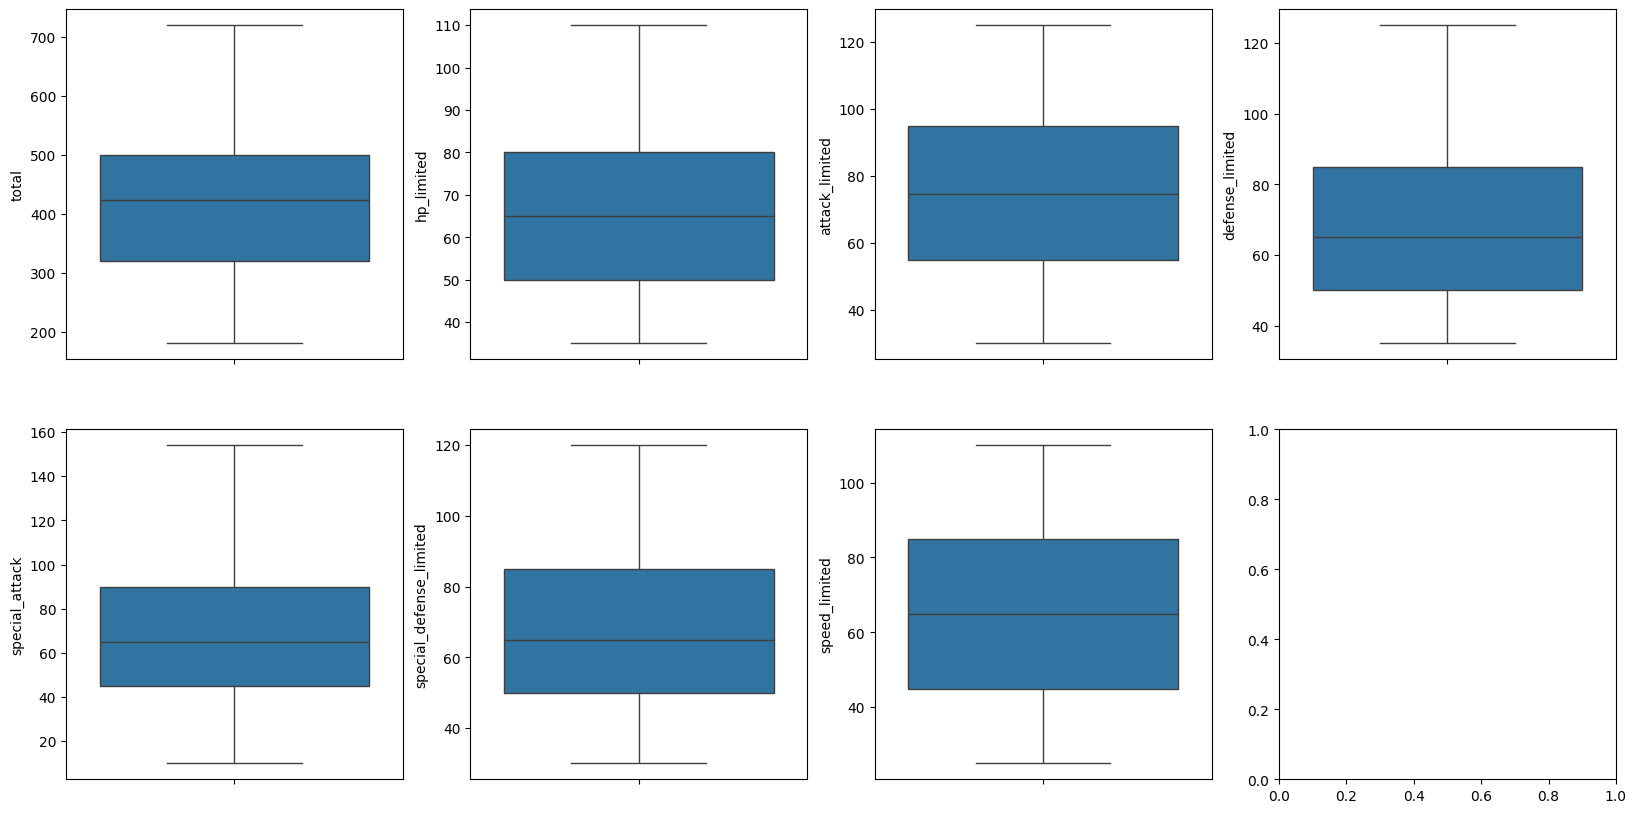

In [15]:
# Create your box plots below this line

from scipy.stats import mstats

# Function to apply limits to remove outliers
def apply_limits(col):
    q1, q3 = data[col].quantile([.25, .75])
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    # Apply the limits: cap the outliers
    col_limited = mstats.winsorize(data[col], limits=0.05)
    return col_limited

# Apply limits to the relevant columns
data["hp_limited"] = apply_limits("hp")
data["attack_limited"] = apply_limits("attack")
data["defense_limited"] = apply_limits("defense")
data["special_defense_limited"] = apply_limits("special_defense")
data["speed_limited"] = apply_limits("speed")


fig , axes = plt.subplots(2, 4, figsize=(20, 10))


sns.boxplot(data["total"], ax=axes[0, 0])
sns.boxplot(data["hp_limited"], ax=axes[0, 1])
sns.boxplot(data["attack_limited"], ax=axes[0, 2])
sns.boxplot(data["defense_limited"], ax=axes[0, 3])
sns.boxplot(data["special_attack"], ax=axes[1, 0])
sns.boxplot(data["special_defense_limited"], ax=axes[1, 1])
sns.boxplot(data["speed_limited"],ax=axes[1,2])

## Part 4: Handle the categorical data (20 Points)

In the cell below handle the categorical data with the techniques you learned in the class. Note that, if a categorical column has too many distinct values you may remove that column altogether.

In [16]:
data.head()

,id,name,type_1,type_2,total,hp,attack,defense,special_attack,special_defense,speed,generation,is_legendary,hp_limited,attack_limited,defense_limited,special_defense_limited,speed_limited
0,1,Bulbasaur,Grass,Poison,318,45,49.0,49,65.0,65,45,1,False,45,49.0,49,65,45
1,2,Ivysaur,Grass,Poison,405,60,62.0,63,80.0,80,60,1,False,60,62.0,63,80,60
2,3,Venusaur,Grass,Poison,525,80,82.0,83,100.0,100,80,1,False,80,82.0,83,100,80
3,4,Charmander,Fire,Flying,309,39,52.0,43,60.0,50,65,1,False,39,52.0,43,50,65
4,5,Charmeleon,Fire,Flying,405,58,64.0,58,80.0,65,80,1,False,58,64.0,58,65,80


In [17]:
# Write your code below this line

data_encoded = pd.get_dummies(data,columns=["type_1","type_2"])
data_encoded.head()




,id,name,total,hp,attack,defense,special_attack,special_defense,speed,generation,...,type_2_Ghost,type_2_Grass,type_2_Ground,type_2_Ice,type_2_Normal,type_2_Poison,type_2_Psychic,type_2_Rock,type_2_Steel,type_2_Water
0,1,Bulbasaur,318,45,49.0,49,65.0,65,45,1,...,False,False,False,False,False,True,False,False,False,False
1,2,Ivysaur,405,60,62.0,63,80.0,80,60,1,...,False,False,False,False,False,True,False,False,False,False
2,3,Venusaur,525,80,82.0,83,100.0,100,80,1,...,False,False,False,False,False,True,False,False,False,False
3,4,Charmander,309,39,52.0,43,60.0,50,65,1,...,False,False,False,False,False,False,False,False,False,False
4,5,Charmeleon,405,58,64.0,58,80.0,65,80,1,...,False,False,False,False,False,False,False,False,False,False


## Part 4: Train linear regression model to estimate total (30 Points)

In the cell below, prepare your data in order to train a linear classifier to estimate the column name: **total**. Prepare a dataframe **X** which contains your features and a dataframe **y** that contains your target variable.

In [18]:
# Write your code below this line
#removing non using columns
data_cleaned = data.drop(columns=["id", "name", "type_1", "type_2", "is_legendary"])

X = data_cleaned.drop(columns=["total"])  #Feature except total column other columns
y = data_cleaned["total"]  # Target 




In the cell below, split your data using 80%, 20% train-test split.

In [19]:
# Write your code below this line
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In the cell below, train and test your linear classifier using scikit-learn. Report the mse values for training and testing predictions. Also plot true totals vs. predicted totals for train and test sets.

Training MSE: 14.02444913581416
Testing MSE: 11.694959830112007
R2 Score (Train): 0.9988264987310378
R2 Score (Test): 0.9990371758414487


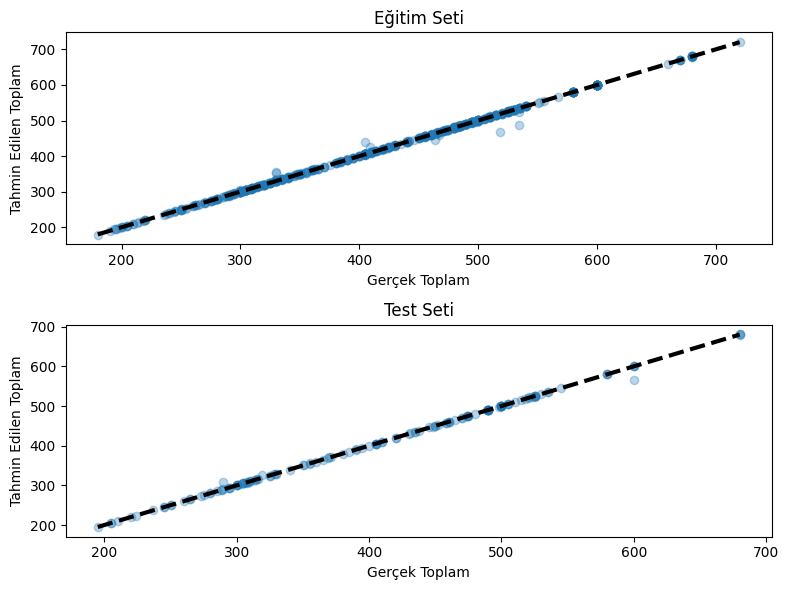

In [20]:
# Write your code below this line

#training model
model_type = linear_model.LinearRegression()
model_type.fit(X_train,y_train)

y_train_pred = model_type.predict(X_train)
y_test_pred = model_type.predict(X_test)

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print("Training MSE:",mse_train)
print("Testing MSE:",mse_test)

r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print("R2 Score (Train):",r2_train)
print("R2 Score (Test):",r2_test)

#plotting

# 2x1 yerleşiminde bir figür ve eksenler oluşturma
fig, axes = plt.subplots(2,1, figsize=(8, 6))

# İlk eksene (üstteki) eğitim seti grafiklerini çizme
axes[0].scatter(y_train, y_train_pred, alpha=0.3)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
axes[0].set_xlabel('Gerçek Toplam')
axes[0].set_ylabel('Tahmin Edilen Toplam')
axes[0].set_title('Eğitim Seti')

# İkinci eksene (alttaki) test seti grafiklerini çizme
axes[1].scatter(y_test, y_test_pred, alpha=0.3)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
axes[1].set_xlabel('Gerçek Toplam')
axes[1].set_ylabel('Tahmin Edilen Toplam')
axes[1].set_title('Test Seti')

# Yerleşimi düzenleme
plt.tight_layout()
plt.show()

